In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import openpyxl
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
column_names = ["datetime", "temp"]

intermittentData = pd.read_excel('intermittent_fault.xlsx', names=column_names, header=None)
normalData = pd.read_excel('normal_node_temp.xlsx', names=column_names, header=None)
softData = pd.read_excel('soft_fault.xlsx',usecols=[0, 1], names=column_names, header=None)
transientData = pd.read_excel('transient_fault.xlsx',names=column_names, header=None)

In [5]:
print(len(normalData))
print(len(intermittentData))
print(len(softData))
print(len(transientData))

566
879
711
1709


In [6]:
data_frames = [normalData, intermittentData, softData, transientData]
for df in data_frames:
    df.set_index('datetime', inplace=True)
    df.index = pd.to_datetime(df.index)

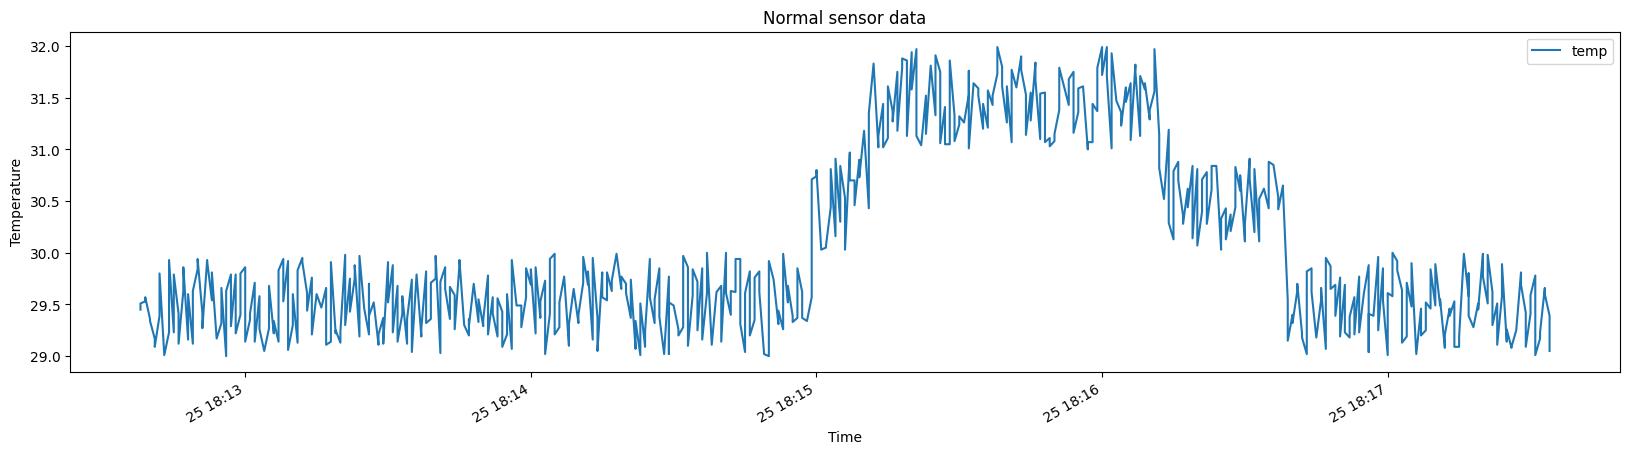

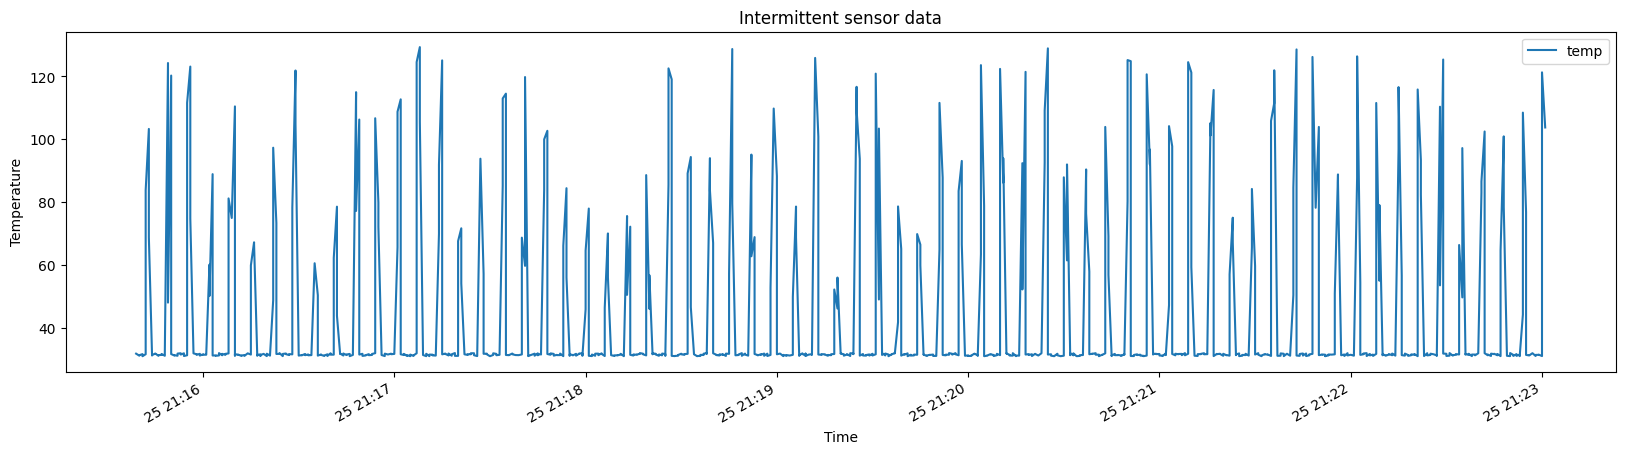

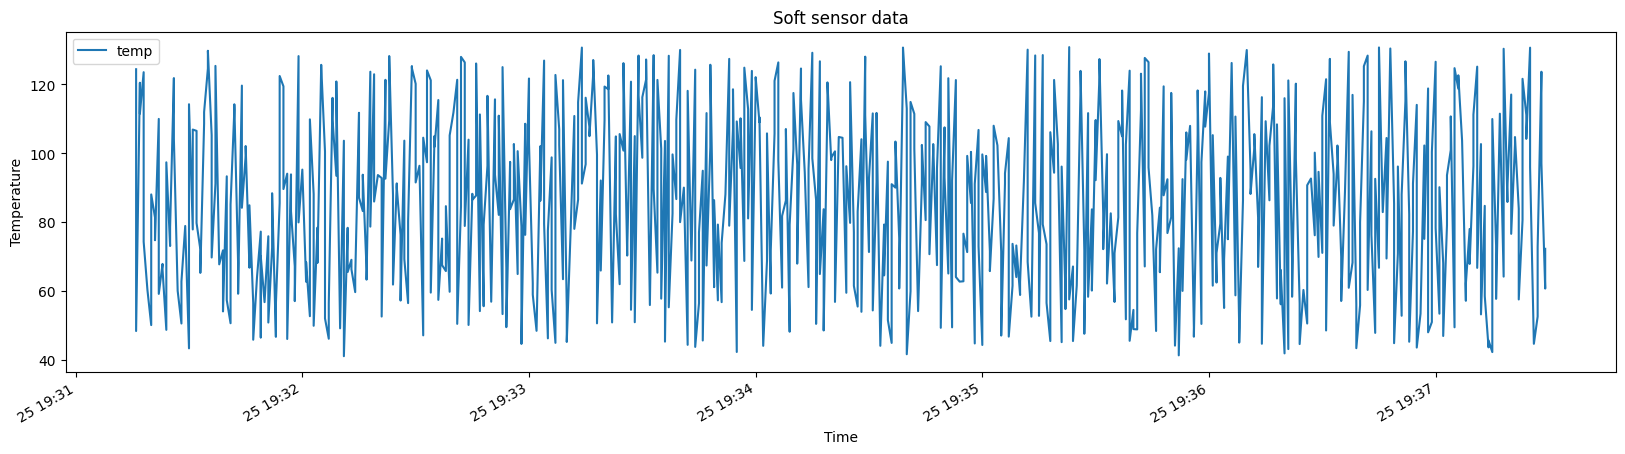

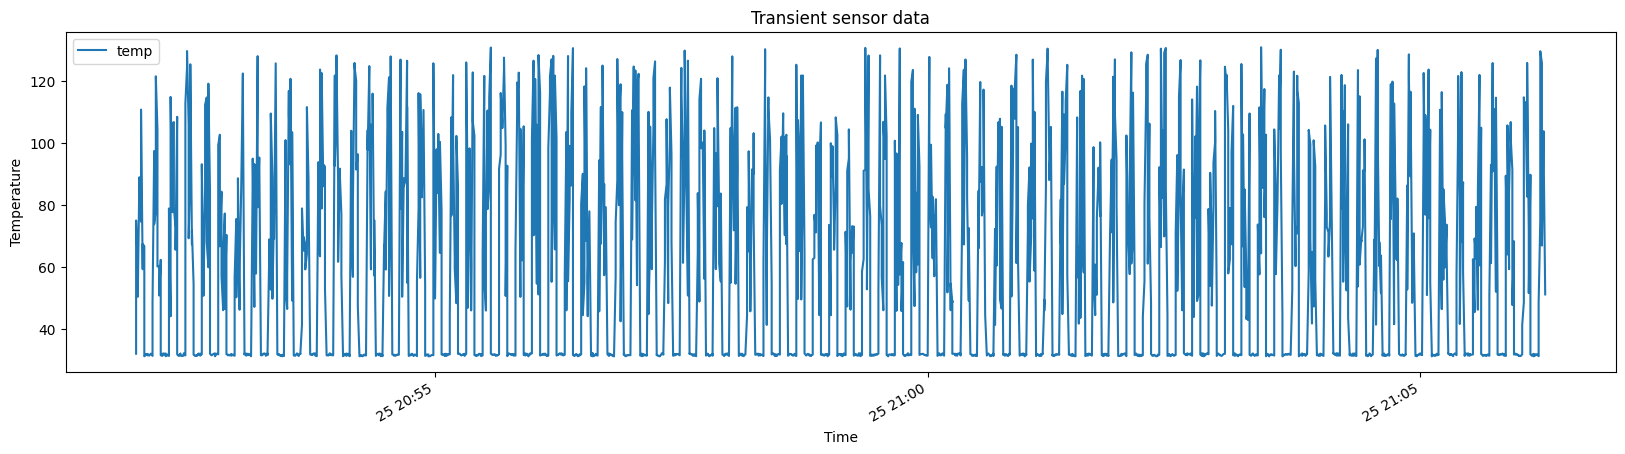

In [7]:
titles = ['Normal sensor data', 'Intermittent sensor data', 'Soft sensor data', 'Transient sensor data']

for data, title in zip(data_frames, titles):
    data.plot(style='-',figsize=(20, 5), title=title)
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.show()

In [8]:
normalData['label'] = 0
intermittentData['label'] = 1
softData['label'] = 2
transientData['label'] = 3

In [9]:
data = pd.concat([normalData, intermittentData, softData, transientData])
data.index = data.index.time
data.index.freq = 'S'

In [10]:
X = data.drop('label', axis=1)
y = data['label']

In [11]:
sequence_length = 50
sequences = []
labels = []

for i in range(len(X) - sequence_length):
    sequences.append(X[i:i+sequence_length])
    labels.append(y[i+sequence_length])


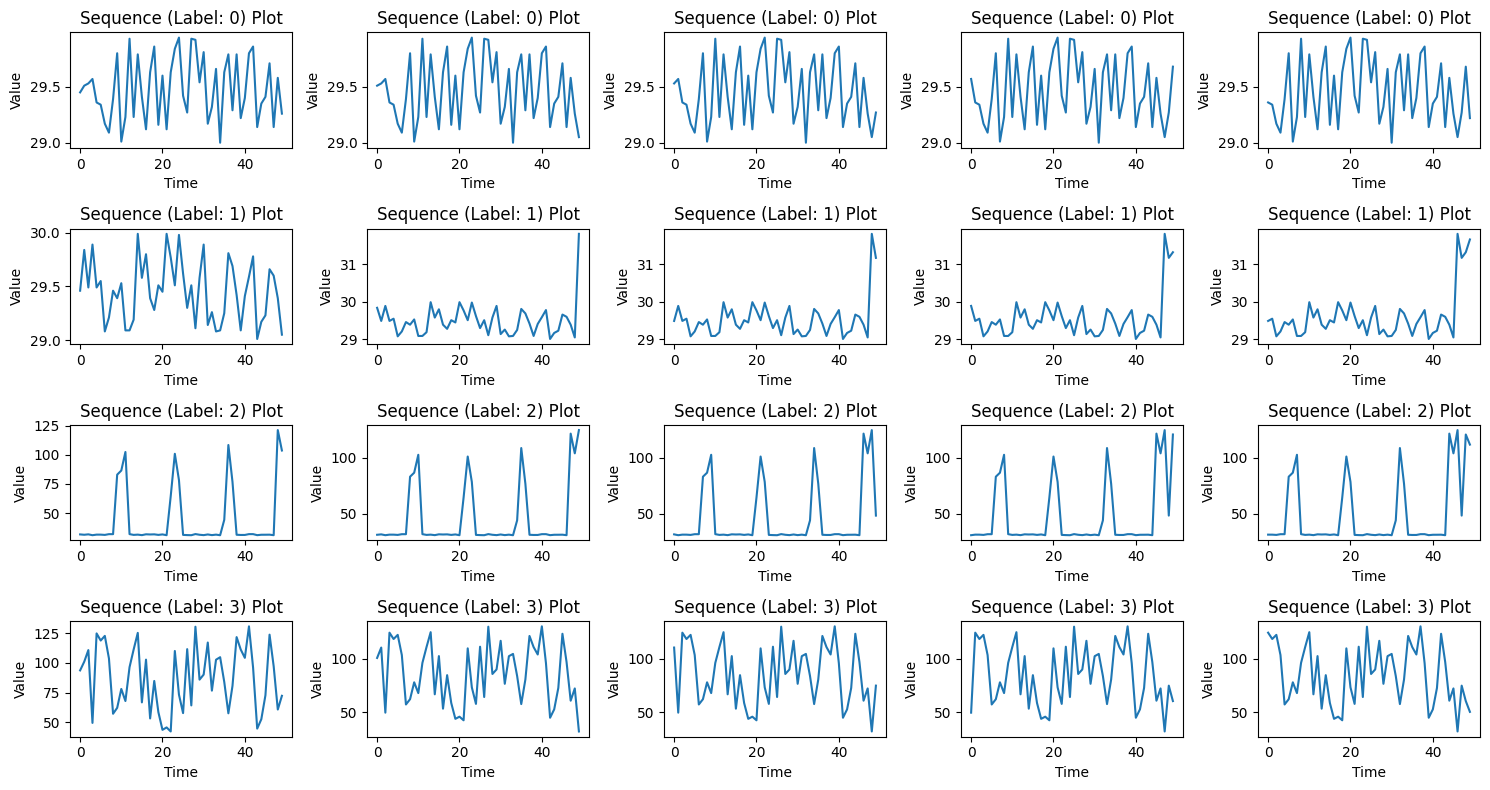

In [12]:
unique_labels = [0,1,2,3]

fig, axes = plt.subplots(4, 5, figsize=(15, 8))

for idx, label in enumerate(unique_labels):

    sequences_with_label = [seq for seq, lbl in zip(sequences, labels) if lbl == label]

    for i, sequence in enumerate(sequences_with_label[:5]):
        time_index = np.arange(len(sequence))
        ax = axes[idx, i]
        ax.plot(time_index, sequence)
        ax.set_xlabel('Time')
        ax.set_ylabel('Value')
        ax.set_title(f'Sequence (Label: {label}) Plot')
plt.tight_layout()
plt.show()

In [13]:
sequences = np.array(sequences)
labels = np.array(labels)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.3, random_state=42)

In [15]:
X_train[0]

array([[ 45.54],
       [ 61.66],
       [119.07],
       [123.95],
       [ 71.87],
       [ 47.65],
       [111.69],
       [ 58.39],
       [ 83.76],
       [ 60.19],
       [109.69],
       [ 92.23],
       [122.18],
       [127.38],
       [ 82.57],
       [ 72.21],
       [ 99.77],
       [ 62.23],
       [ 82.61],
       [ 56.88],
       [ 71.04],
       [ 81.41],
       [109.39],
       [104.96],
       [118.25],
       [ 51.85],
       [102.54],
       [124.01],
       [ 45.61],
       [ 54.58],
       [ 49.  ],
       [ 48.92],
       [ 76.83],
       [112.64],
       [123.13],
       [ 67.19],
       [127.71],
       [126.48],
       [ 95.9 ],
       [ 82.02],
       [ 48.46],
       [ 72.2 ],
       [ 84.25],
       [ 65.52],
       [119.46],
       [ 87.84],
       [ 92.49],
       [ 76.89],
       [ 81.49],
       [117.55]])

In [16]:
model = keras.Sequential([
    layers.LSTM(64, input_shape=(sequence_length, X.shape[1]), return_sequences=False),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
# layers.LSTM(32, return_sequences=False),

Epoch 1/15
34/34 [==============================] - 5s 58ms/step - loss: 1.1725 - accuracy: 0.3998 - val_loss: 0.9807 - val_accuracy: 0.6067
Epoch 2/15
34/34 [==============================] - 1s 40ms/step - loss: 0.8385 - accuracy: 0.7022 - val_loss: 0.6877 - val_accuracy: 0.7622
Epoch 3/15
34/34 [==============================] - 1s 41ms/step - loss: 0.5288 - accuracy: 0.8745 - val_loss: 0.2839 - val_accuracy: 0.9850
Epoch 4/15
34/34 [==============================] - 3s 88ms/step - loss: 0.2000 - accuracy: 0.9780 - val_loss: 0.1156 - val_accuracy: 0.9925
Epoch 5/15
34/34 [==============================] - 3s 80ms/step - loss: 0.1054 - accuracy: 0.9841 - val_loss: 0.0538 - val_accuracy: 0.9925
Epoch 6/15
34/34 [==============================] - 2s 46ms/step - loss: 0.0744 - accuracy: 0.9864 - val_loss: 0.0681 - val_accuracy: 0.9869
Epoch 7/15
34/34 [==============================] - 1s 36ms/step - loss: 0.0642 - accuracy: 0.9864 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 8/15
34

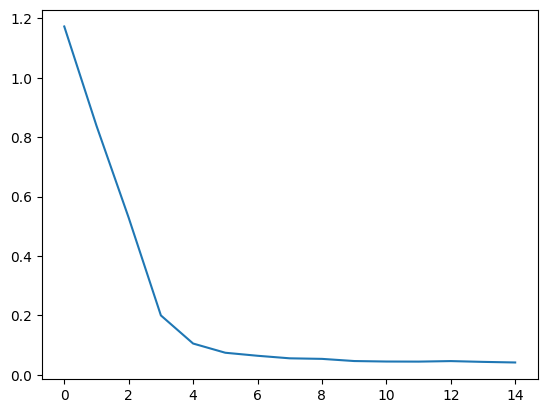

In [17]:
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [18]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

36/36 [==============================] - 0s 8ms/step - loss: 0.0290 - accuracy: 0.9956
Test Accuracy: 0.9956331849098206


In [19]:
predictions = model.predict(X_test)
predictions

36/36 [==============================] - 1s 8ms/step


array([[1.3927796e-03, 9.9767846e-01, 2.9479465e-04, 6.3397671e-04],
       [5.4304855e-04, 2.8928057e-03, 9.7900683e-01, 1.7557405e-02],
       [2.5333065e-04, 7.7739800e-04, 5.2776746e-03, 9.9369156e-01],
       ...,
       [5.1713607e-05, 5.0516077e-04, 2.9107733e-04, 9.9915206e-01],
       [5.4050906e-05, 4.8437959e-04, 3.1558465e-04, 9.9914598e-01],
       [5.3015989e-05, 4.8852526e-04, 2.9906296e-04, 9.9915946e-01]],
      dtype=float32)

In [20]:

predicted_labels = np.argmax(predictions, axis=1)

class_report = classification_report(y_test, predicted_labels)

print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, predicted_labels)
print(conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       262
           2       0.98      1.00      0.99       206
           3       1.00      0.99      1.00       499

    accuracy                           1.00      1145
   macro avg       0.99      1.00      1.00      1145
weighted avg       1.00      1.00      1.00      1145

[[178   0   0   0]
 [  0 262   0   0]
 [  0   1 205   0]
 [  0   0   4 495]]


In [21]:
lstm_layer = model.layers[0]  
weights_and_biases = lstm_layer.get_weights()

W, U, b = weights_and_biases


In [22]:
print(W[0][0])
print(U[0][0])
print(b[0])

-0.036626622
0.07533342
-0.01710954
